In [2]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_openml


images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

In [3]:
def k_means(x, k, max_iter=100, threshold=1e-1):
    np.random.seed(42)
    rand_index = np.random.choice(x.shape[0], k, replace=False)
    centroids = x[rand_index]
    for iteration in range(max_iter):
        distances = np.linalg.norm(x[:, np.newaxis] - centroids, axis=2)
        nlabels = np.argmin(distances, axis=1)
        centroids_reworked = np.array([x[nlabels == i].mean(axis=0) for i in range(k)])
        shift = np.linalg.norm(centroids_reworked - centroids)
        if shift < threshold:
            break
        centroids = centroids_reworked
    sse = np.sum((x - centroids[nlabels]) ** 2)
    return nlabels, sse

cluster_labels, total_sse = k_means(images, k=10)
print(f"Clusters: {cluster_labels}",  f"Summary quadratic variation: {total_sse}\n")
print(len(list(cluster_labels)))

Clusters: [0 5 9 ... 4 4 6] Summary quadratic variation: 179546363495.5339

70000


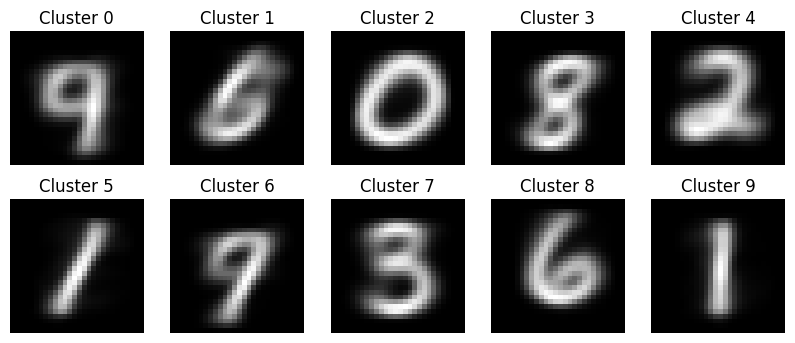

Cluster 0 is interpreted as digit 4 with accuracy 0.36
Cluster 1 is interpreted as digit 6 with accuracy 0.31
Cluster 2 is interpreted as digit 0 with accuracy 0.94
Cluster 3 is interpreted as digit 8 with accuracy 0.61
Cluster 4 is interpreted as digit 2 with accuracy 0.92
Cluster 5 is interpreted as digit 1 with accuracy 0.67
Cluster 6 is interpreted as digit 7 with accuracy 0.44
Cluster 7 is interpreted as digit 3 with accuracy 0.53
Cluster 8 is interpreted as digit 6 with accuracy 0.87
Cluster 9 is interpreted as digit 1 with accuracy 0.64


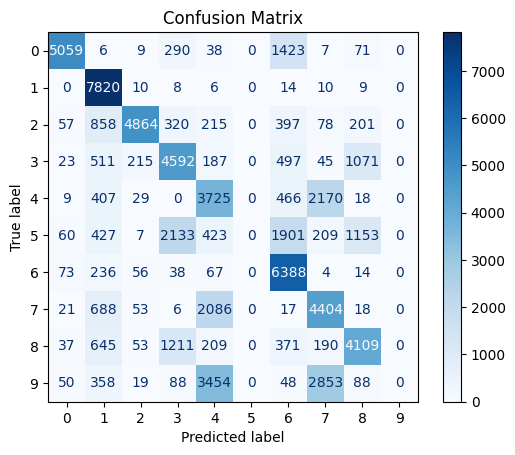

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


labels = np.array(labels, dtype=int)
k = 10
kmeans = KMeans(n_clusters=k, init='random', random_state=None) #random_state=42
kmeans.fit(images)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_.reshape(k, 28, 28)
plt.figure(figsize=(10, 4))
for i in range(k):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroids[i], cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.show()
rr = np.arange(k)
cluster_to_digit = dict(map(lambda x: (x, np.bincount(labels[cluster_labels == x]).argmax()), rr))
accuracy_per_cluster = dict(map(lambda x: (x, np.mean(labels[cluster_labels == x] == cluster_to_digit[x])), rr))
for cluster, digit in cluster_to_digit.items():
    print(f'Cluster {cluster} is interpreted as digit {digit} with accuracy {accuracy_per_cluster[cluster]:.2f}')
conf_matrix = confusion_matrix(labels, [cluster_to_digit[label] for label in cluster_labels])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()